# 5 Modeling

### 5.1.Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve


### 5.2. Load data

In [2]:
expected_model_version = '1.0'
model_path_CO = 'Desktop/Springboard/Capstone2/CO_model.pkl'
if os.path.exists(model_path_CO):
    with open(model_path_CO, 'rb') as f:
        model_CO = pickle.load(f)  
else:
    print("Expected model not found")
    
model_path_NOX = 'Desktop/Springboard/Capstone2/NOX_model.pkl'
if os.path.exists(model_path_NOX):
    with open(model_path_NOX, 'rb') as f:
        model_NOX = pickle.load(f)  
else:
    print("Expected model not found")    
    
model_path_NO2 = 'Desktop/Springboard/Capstone2/NO2_model.pkl'
if os.path.exists(model_path_NO2):
    with open(model_path_NO2, 'rb') as f:
        model_NO2 = pickle.load(f)  
else:
    print("Expected model not found")    
    
model_path_NMH = 'Desktop/Springboard/Capstone2/NMH_model.pkl'
if os.path.exists(model_path_NMH):
    with open(model_path_NMH, 'rb') as f:
        model_NMH = pickle.load(f)  
else:
    print("Expected model not found")    
    
    

In [3]:
df = pd.read_csv('Desktop/Springboard/Capstone2/Wrangledata.csv')


### 5.3.1 Investigating humidity effect on CO sensor & real data

The main objective in section 5.3 is to investigate the effect of humidity on pollution real data. For this purpose, I will use average data for sensor and temperature and change the absolute humidity between minimum and maximum ranges to see how real data change.

In [4]:
df['Temperature'].describe()

count    8991.000000
mean       18.317829
std         8.832116
min        -1.900000
25%        11.800000
50%        17.800000
75%        24.400000
max        44.600000
Name: Temperature, dtype: float64

In [5]:
df['Absolute Humidity'].describe()

count    8991.000000
mean        1.025530
std         0.403813
min         0.184700
25%         0.736800
50%         0.995400
75%         1.313700
max         2.231000
Name: Absolute Humidity, dtype: float64

In [6]:
CO=df[['CO_Real', 'Temperature','Absolute Humidity','CO_Sensor']]
CO.dropna(inplace=True)
X_CO=CO[['CO_Sensor', 'Temperature','Absolute Humidity']]
y_CO=CO['CO_Real']

<ipython-input-6-9f49d4ced664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO.dropna(inplace=True)


Let's see the effect of humidity change on real data prediction in average sensor data and temperature.

In [7]:
# Average sensor data
X_CO['CO_Sensor'].mean()

1110.5807461873637

In [8]:
# Average temperature data
X_CO['Temperature'].mean()

17.77042483660141

In [9]:
list_CO=[]
for i in np.arange(0.2,2.4,0.2):
    list_CO.append((model_CO.predict([[1110,18,i]]).tolist()))


In [10]:
# Humidity range
Humidity=np.arange(0.2,2.4,0.2)

In [11]:
y_CO.describe()

count    7344.000000
mean        2.129711
std         1.436472
min         0.100000
25%         1.100000
50%         1.800000
75%         2.800000
max        11.900000
Name: CO_Real, dtype: float64

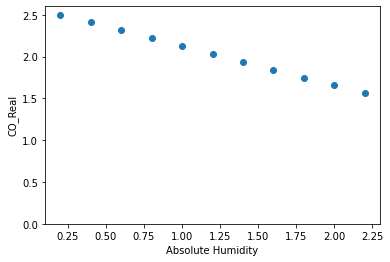

In [12]:
#Humidity change effect on CO real data
plt.scatter(Humidity,list_CO)
plt.xlabel('Absolute Humidity')
plt.ylabel('CO_Real');
plt.ylim([0,2.6]);

As it was expected based on linear model, increasing humidity decreased the CO real data linearly. So, humidity is very important in difference between sensor and real data. The change is between 2.5 to 1.6. So, the real data changed more than 30% between low and high ranges of humidities.

### 5.3.2 Investigating humidity effect on NOX sensor & real data

In [13]:
NOX=df[['NOX_Real', 'Temperature','Absolute Humidity','NOX_Sensor']]
NOX.dropna(inplace=True)
X_NOX=NOX[['NOX_Sensor', 'Temperature','Absolute Humidity']]
y_NOX=NOX['NOX_Real']

<ipython-input-13-e8157f27c699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOX.dropna(inplace=True)


In [14]:
# Average sensor data
X_NOX['NOX_Sensor'].mean()

824.5332612222824

In [15]:
# Average temperature data
X_NOX['Temperature'].mean()

17.969240129799978

In [16]:
list_NOX=[]
for i in np.arange(0.2,2.4,0.2):
    list_NOX.append((model_NOX.predict([[825,18,i]]).tolist()))

In [17]:
y_NOX.describe()

count    7396.000000
mean      242.189292
std       206.312007
min         2.000000
25%        97.000000
50%       178.000000
75%       321.000000
max      1479.000000
Name: NOX_Real, dtype: float64

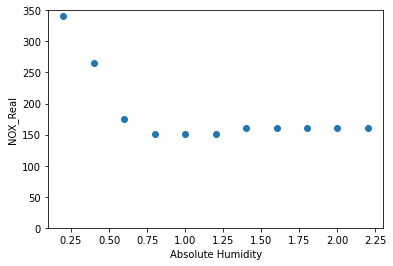

In [18]:
#Humidity change effect on NOX real data
plt.scatter(Humidity,list_NOX)
plt.xlabel('Absolute Humidity')
plt.ylabel('NOX_Real');
plt.ylim([0,350]);

Interestingly, low ranges of humidities (0.2-0.75) have huge effect on NOX real data and difference between real and sensor data while in humidities higher than 0.75, the NOX real data did not move alot. in humidities between 0.2 to 0.75, the real data changed more than 50%.

### 5.3.3 Investigating humidity effect on NO2 sensor & real data

In [19]:
NO2=df[['NO2_Real', 'Temperature','Absolute Humidity','NO2_Sensor']]
NO2.dropna(inplace=True)
X_NO2=NO2[['NO2_Sensor', 'Temperature','Absolute Humidity']]
y_NO2=NO2['NO2_Real']

<ipython-input-19-806248704d34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO2.dropna(inplace=True)


In [20]:
# Average sensor data
X_NO2['NO2_Sensor'].mean()

1452.0113620992831

In [21]:
list_NO2=[]
for i in np.arange(0.2,2.4,0.2):
    list_NO2.append((model_NO2.predict([[1452,18,i]]).tolist()))

In [22]:
y_NO2.describe()

count    7393.000000
mean      112.145137
std        47.629141
min         2.000000
25%        77.000000
50%       109.000000
75%       140.000000
max       333.000000
Name: NO2_Real, dtype: float64

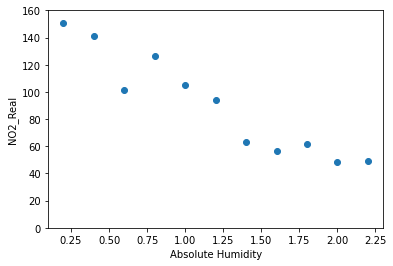

In [24]:
#Humidity change effect on NO2 real data
plt.scatter(Humidity,list_NO2)
plt.xlabel('Absolute Humidity')
plt.ylabel('NO2_Real');
plt.ylim([0,160]);

It seems increasing humidity decreased the NO2 real data. The trend is close to linear trend. Also, it seems in high humidity ranges (above 2), the NO2 real data did not change.The NO2 real data changed more than 60% between low and high ranges of humidities.

### 5.3.4 Investigating humidity effect on NMH sensor & real data

In [25]:
NMH=df[['Non Metanic Hydrocarbons_Real', 'Temperature','Absolute Humidity','Non Metanic Hydrocarbons_Sensor']]
NMH.dropna(inplace=True)
X_NMH=(NMH[['Non Metanic Hydrocarbons_Sensor', 'Temperature','Absolute Humidity']])
y_NMH=NMH['Non Metanic Hydrocarbons_Real']

<ipython-input-25-923deab573a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NMH.dropna(inplace=True)


In [26]:
# Average sensor data
X_NMH['Non Metanic Hydrocarbons_Sensor'].mean()

943.4622322435175

In [27]:
list_NMH=[]
for i in np.arange(0.2,2.4,0.2):
    list_NMH.append((model_NMH.predict([[944,18,i]]).tolist()))

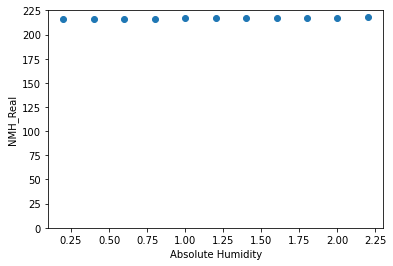

In [28]:
#Humidity change effect on NMH real data
plt.scatter(Humidity,list_NMH)
plt.xlabel('Absolute Humidity')
plt.ylabel('NMH_Real');
plt.ylim([0,225]);

Humidity did not affect non methanic hydrocarbons real data. 

### 5.4. Summary

Here are the main conclusions for CO, NOX, NO2 and non methanic hydrocarbons real data changes with humidities(between 0.2-2.2):
* CO real data decreased by increasing humidity. The change between minimum and maximum level was around 30%.
* NOX real data decreased by increasing humidity just in lower ranges of humidity (0.2-0.75). The change between minimum and maximum level was around 50%.
* NO2 real data decreased significantly by increasing humidity. The change between minimum and maximum level was around 60%.
* NMH real data did not change by increasing humidity. 
